In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [9]:

data = pd.read_csv('icecream_sales.csv')

data.head()



,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [3]:
X = data[['Temperature']].values
y = data['Revenue'].values



In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Degrees of polynomial regression to test
degrees = [1, 3, 5]

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_error = mean_squared_error(y_train, model.predict(X_train_poly))
    val_error = mean_squared_error(y_val, model.predict(X_val_poly))

    print(f"Degree {degree}: Train Error = {train_error:.2f}, Val Error = {val_error:.2f}")

Degree 1: Train Error = 613.53, Val Error = 652.49
Degree 3: Train Error = 610.83, Val Error = 651.55
Degree 5: Train Error = 608.74, Val Error = 647.05


##### Analyze Training vs. Validation Error

In [17]:

train_errors, val_errors = [], []

for d in range(1, 10):
    model = LinearRegression()
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    X_val_poly = PolynomialFeatures(d).fit_transform(X_val)

    model.fit(X_train_poly, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    val_errors.append(mean_squared_error(y_val, model.predict(X_val_poly)))

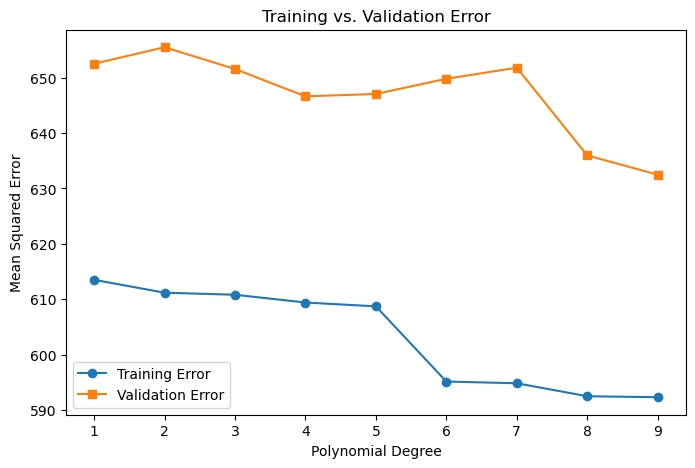

In [18]:

plt.plot(range(1, 10), train_errors, label='Training Error', marker='o')
plt.plot(range(1, 10), val_errors, label='Validation Error', marker='s')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Validation Error')
plt.legend()
plt.show()
